In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import naive_bayes
from sklearn import svm


import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None


import pickle
import df_trimmer


In [120]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
df.shape

(24150, 91)

# function for testing

In [121]:
# for key, value in df_dict.items(model_function):
    
#     df = value
#     X = df[0]
#     y = df[1]

def model_trainer(model_function, X, y):
    roc_auc_list = []
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=42)

    kf = StratifiedKFold(n_splits=5, random_state=42)

    for train_ind, val_ind in kf.split(X_train, y_train):

        X_ktrain, X_kval = X.iloc[train_ind], X.iloc[val_ind]
        y_ktrain, y_kval = y.iloc[train_ind], y.iloc[val_ind]

        ros = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = ros.fit_resample(X_ktrain, y_ktrain)

        reg = model_function
        reg.fit(X_train_resampled,y_train_resampled)
        y_pred = reg.predict_proba(X_kval)[:,1]
        score = roc_auc_score(y_kval, y_pred)

        roc_auc_list.append(score)

    mean_roc_auc = sum(roc_auc_list)/len(roc_auc_list)

    #print(sum(roc_auc_list)/len(roc_auc_list))
    print(mean_roc_auc)
    return mean_roc_auc

# Logistic

In [122]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
df_dict = {'all_features':df_trimmer.all_features(df),
           'no_targ_pop':df_trimmer.no_targ_pop(df),
           'no_years':df_trimmer.no_years(df), 
           'no_years_no_target': df_trimmer.no_years_no_target(df),
           'subtype':df_trimmer.conv_subt(df), 'subtype_no_targ':df_trimmer.subt_no_target(df), 
           'subt_no_tar_no_year':df_trimmer.subt_no_targ_no_years(df),
           'class':df_trimmer.conv_class(df), 'class_no_target':df_trimmer.class_no_target(df),
           'type':df_trimmer.conv_type(df), 'type_no_target':df_trimmer.type_no_target(df)}
best_mean_roc_auc = {}
roc_auc_list = []


In [123]:
for_analysis = df_dict['no_years_no_target']

In [124]:
for_analysis[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24150 entries, 49 to 26019
Data columns (total 68 columns):
race_American Indian or Alaska Native - Non-Hispanic         24150 non-null uint8
race_Asian or Pacific Islander - Non-Hispanic                24150 non-null uint8
race_Black - Non-Hispanic                                    24150 non-null uint8
race_White - Hispanic                                        24150 non-null uint8
race_White - Non-Hispanic                                    24150 non-null uint8
age_at_release_25-34                                         24150 non-null uint8
age_at_release_35-44                                         24150 non-null uint8
age_at_release_45-54                                         24150 non-null uint8
age_at_release_55 and Older                                  24150 non-null uint8
age_at_release_Under 25                                      24150 non-null uint8
conviction_class_Aggravated Misdemeanor                      24150 non

In [125]:
best_mean_roc = {}

for key, value in df_dict.items():
    
    df = value
    X = df[0]
    y = df[1]
    best_mean_roc[key] = model_trainer(LogisticRegression(), X, y)

0.6259167683387536
0.6248704534789425
0.6379582801257285
0.6443278160165826
0.6002769169748345
0.5725938557208643
0.5933486277198468
0.6018820260385105
0.5739736503552244
0.6059579542159873
0.5865689904118204


In [126]:
best_mean_roc

{'all_features': 0.6259167683387536,
 'no_targ_pop': 0.6248704534789425,
 'no_years': 0.6379582801257285,
 'no_years_no_target': 0.6443278160165826,
 'subtype': 0.6002769169748345,
 'subtype_no_targ': 0.5725938557208643,
 'subt_no_tar_no_year': 0.5933486277198468,
 'class': 0.6018820260385105,
 'class_no_target': 0.5739736503552244,
 'type': 0.6059579542159873,
 'type_no_target': 0.5865689904118204}

### with no years no target

In [127]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]

df = df_trimmer.no_years_no_target(df)
X = df[0]
y = df[1]

# C_range = np.linspace(1,20,50)
C_range = np.linspace(1,2,20)
best_C = 0
best_roc = 0
for C in C_range:
    model_roc = model_trainer(LogisticRegression(C=C), X, y)
    if model_roc > best_roc:
        best_C = C
        best_roc = model_roc
print(best_C, best_roc)

0.6443278160165826
0.6443236482259702
0.6443279691612015
0.6443358315845537
0.644342671034164
0.6443255680860364
0.6443315595413109
0.6443237212451052
0.64432148055841
0.6443263271461331
0.644332840938242
0.6443273325077964
0.6443256317647841
0.6443228751724331
0.6443223832139157
0.6443118389532796
0.6443021555757904
0.6442999363866675
0.6442930678663069
0.644294561083254
1.2105263157894737 0.644342671034164


In [128]:
print(best_C)

1.2105263157894737


# Knn

In [9]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
df_dict = {'all_features':df_trimmer.all_features(df),
           'no_targ_pop':df_trimmer.no_targ_pop(df),
           'no_years':df_trimmer.no_years(df), 
           'no_years_no_target': df_trimmer.no_years_no_target(df),
           'subtype':df_trimmer.conv_subt(df), 'subtype_no_targ':df_trimmer.subt_no_target(df), 
           'subt_no_tar_no_year':df_trimmer.subt_no_targ_no_years(df),
           'class':df_trimmer.conv_class(df), 'class_no_target':df_trimmer.class_no_target(df),
           'type':df_trimmer.conv_type(df), 'type_no_target':df_trimmer.type_no_target(df)}
best_mean_roc_auc = {}
roc_auc_list = []

In [10]:
best_mean_roc = {}

for key, value in df_dict.items():
    
    df = value
    X = df[0]
    y = df[1]
    best_mean_roc[key] = model_trainer(KNeighborsClassifier(), X, y)

0.5354161341668107
0.5284160872234279
0.5522638525262046


KeyboardInterrupt: 

In [ ]:
print(best_mean_roc)

In [11]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]

df = df_trimmer.no_years_no_target(df)
X = df[0]
y = df[1]

# C_range = np.linspace(1,20,50)
K_range = np.linspace(2,12,10)
best_K = 0
best_roc = 0
for K in range(12,16):
    model_roc = model_trainer(KNeighborsClassifier(n_neighbors=K), X, y)
    if model_roc > best_roc:
        best_K = K
        best_roc = model_roc
    print(K)
print(best_K, best_roc)

KeyboardInterrupt: 

# Naive-Bayes Bernouli

In [410]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
df_dict = {'all_features':df_trimmer.all_features(df),
           'no_targ_pop':df_trimmer.no_targ_pop(df),
           'no_years':df_trimmer.no_years(df), 
           'no_years_no_target': df_trimmer.no_years_no_target(df),
           'subtype':df_trimmer.conv_subt(df), 'subtype_no_targ':df_trimmer.subt_no_target(df), 
           'subt_no_tar_no_year':df_trimmer.subt_no_targ_no_years(df),
           'class':df_trimmer.conv_class(df), 'class_no_target':df_trimmer.class_no_target(df),
           'type':df_trimmer.conv_type(df), 'type_no_target':df_trimmer.type_no_target(df)}
best_mean_roc_auc = {}
roc_auc_list = []

In [411]:
best_mean_roc = {}

for key, value in df_dict.items():
    
    df = value
    X = df[0]
    y = df[1]
    print(key)
    best_mean_roc[key] = model_trainer(naive_bayes.BernoulliNB(), X, y)

all_features
0.6056066876918941
no_targ_pop
0.605280110219917
no_years
0.6254983141718499
no_years_no_target
0.6266309993864152
subtype
0.5933795318582685
subtype_no_targ
0.5699823964756435
subt_no_tar_no_year
0.5917707345050085
class
0.5988526098424409
class_no_target
0.5724899123976942
type
0.60524009066357
type_no_target
0.5854191628758054


In [412]:
print(best_mean_roc)

{'all_features': 0.6056066876918941, 'no_targ_pop': 0.605280110219917, 'no_years': 0.6254983141718499, 'no_years_no_target': 0.6266309993864152, 'subtype': 0.5933795318582685, 'subtype_no_targ': 0.5699823964756435, 'subt_no_tar_no_year': 0.5917707345050085, 'class': 0.5988526098424409, 'class_no_target': 0.5724899123976942, 'type': 0.60524009066357, 'type_no_target': 0.5854191628758054}


In [413]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
df=df_trimmer.no_years_no_target(df)
X = df[0]
y = df[1]


In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

reg = naive_bayes.BernoulliNB()
reg.fit(X_train_resampled,y_train_resampled)
y_pred = reg.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, y_pred)
nb_fpr, nb_tpr, nb_roc = roc_curve(y_test, y_pred)

In [425]:
score

0.6458250723674777

# Random Forest

In [12]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
df_dict = {'all_features':df_trimmer.all_features(df),
           'no_targ_pop':df_trimmer.no_targ_pop(df),
           'no_years':df_trimmer.no_years(df), 
           'no_years_no_target': df_trimmer.no_years_no_target(df),
           'subtype':df_trimmer.conv_subt(df), 'subtype_no_targ':df_trimmer.subt_no_target(df), 
           'subt_no_tar_no_year':df_trimmer.subt_no_targ_no_years(df),
           'class':df_trimmer.conv_class(df), 'class_no_target':df_trimmer.class_no_target(df),
           'type':df_trimmer.conv_type(df), 'type_no_target':df_trimmer.type_no_target(df)}
best_mean_roc_auc = {}
roc_auc_list = []

In [13]:
best_mean_roc = {}
for depth in range(2,10):
    for key, value in df_dict.items():

        df = value
        X = df[0]
        y = df[1]
        dict_str = str(key)+str(depth)
        best_mean_roc[dict_str] = [model_trainer(RandomForestClassifier(max_depth=depth), X, y)]

0.5934198721928597
0.5932862342266702
0.5999159831258181
0.6009821098579794
0.5979276550161772
0.5621721565784019
0.5811423002697713
0.5946391023400869
0.5704173463789087
0.5975052417288614
0.5797303467525645
0.5945398820862156
0.6034456949143641
0.6038127409845617
0.6139937391462569
0.5816051586469836
0.5580723428188368
0.5802833947397072
0.6030061348043246
0.5715036986962055
0.5993951897664254
0.5804929364078378
0.6117783006721835
0.6045044634909474
0.6153103897055979
0.611372529899788
0.59986189370328
0.5511738852787408
0.5857085008646619
0.5962497613844485
0.5730405422915645
0.6084311352025328
0.5825060989962509
0.605520594480559
0.6133301524683015
0.6221974520502396
0.6155511385205298
0.5942837519758881
0.5605737809066879
0.5870379912064932
0.5961644766424998
0.5761926290846077
0.6050918522640056
0.5869545340612824
0.6157828626467344
0.6052093444832848
0.6131715010423813
0.6228054954781872
0.6044368771596433
0.5669719173194971
0.590398458450936
0.6026821688284258
0.574024985908511

In [14]:
print(best_mean_roc)

{'all_features2': [0.5934198721928597], 'no_targ_pop2': [0.5932862342266702], 'no_years2': [0.5999159831258181], 'no_years_no_target2': [0.6009821098579794], 'subtype2': [0.5979276550161772], 'subtype_no_targ2': [0.5621721565784019], 'subt_no_tar_no_year2': [0.5811423002697713], 'class2': [0.5946391023400869], 'class_no_target2': [0.5704173463789087], 'type2': [0.5975052417288614], 'type_no_target2': [0.5797303467525645], 'all_features3': [0.5945398820862156], 'no_targ_pop3': [0.6034456949143641], 'no_years3': [0.6038127409845617], 'no_years_no_target3': [0.6139937391462569], 'subtype3': [0.5816051586469836], 'subtype_no_targ3': [0.5580723428188368], 'subt_no_tar_no_year3': [0.5802833947397072], 'class3': [0.6030061348043246], 'class_no_target3': [0.5715036986962055], 'type3': [0.5993951897664254], 'type_no_target3': [0.5804929364078378], 'all_features4': [0.6117783006721835], 'no_targ_pop4': [0.6045044634909474], 'no_years4': [0.6153103897055979], 'no_years_no_target4': [0.61137252989

In [15]:
max_rf = 0
max_dep_comb = 0
for key, value in best_mean_roc.items():
    if best_mean_roc[key][0] > max_rf:
        max_rf = value
        max_dep_comb = key
print(max_rf, max_dep_comb)

[0.6301762680085373] no_years8


## Random Forest Feature Importances

In [103]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
df = df_trimmer.no_years(df)
X = df[0]
y = df[1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=42)

In [104]:
rf = RandomForestClassifier(max_depth=8)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.6538358872036467

In [105]:
rf_fpr, rf_tpr, rf_log_roc = roc_curve(y_test, y_pred)

In [10]:
import operator

df_feature_imp = {}

for imp, feature in (zip(rf.feature_importances_, list(X))):
    df_feature_imp[feature] = imp

sorted_features = sorted(df_feature_imp.items(), key=operator.itemgetter(1)) 
sorted_features

[('conviction_subtype_Sex Offender Registry/Residency', 0.0004375237282574406),
 ('conviction_subtype_Special Sentence Revocation', 0.0005595443938951711),
 ('conviction_class_Felony - Enhanced', 0.0006152423024981221),
 ('conviction_subtype_Forgery/Fraud', 0.000641745225002946),
 ('conviction_subtype_Arson', 0.0008204309628834311),
 ('release_type_Paroled to Detainer - Iowa', 0.000963791875145378),
 ('conviction_subtype_Other Drug', 0.0014057341712757163),
 ('release_type_Paroled to Detainer - Out of State', 0.0014503461144670373),
 ('conviction_subtype_Theft', 0.0014743567564517134),
 ('conviction_subtype_Vandalism', 0.0014836305290616971),
 ('conviction_subtype_Other Public Order', 0.0016962627442627144),
 ('conviction_class_Serious Misdemeanor', 0.0016981813214821326),
 ('conviction_subtype_Flight/Escape', 0.0017321142814005891),
 ('conviction_subtype_Robbery', 0.0018633235860737562),
 ('supervising_district_6JD', 0.0019777721625346962),
 ('conviction_class_Felony - Enhancement to 

## Feature Importance Subtype

In [38]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
list(df)

['recid_flag',
 'target_pop_flag',
 'year_released_2010',
 'year_released_2011',
 'year_released_2012',
 'year_released_2013',
 'year_released_2014',
 'year_released_2015',
 'reporting_year_2013',
 'reporting_year_2014',
 'reporting_year_2015',
 'reporting_year_2016',
 'reporting_year_2017',
 'reporting_year_2018',
 'race_American Indian or Alaska Native - Non-Hispanic',
 'race_Asian or Pacific Islander - Non-Hispanic',
 'race_Black - Non-Hispanic',
 'race_White - Hispanic',
 'race_White - Non-Hispanic',
 'age_at_release_25-34',
 'age_at_release_35-44',
 'age_at_release_45-54',
 'age_at_release_55 and Older',
 'age_at_release_Under 25',
 'conviction_class_A Felony',
 'conviction_class_Aggravated Misdemeanor',
 'conviction_class_B Felony',
 'conviction_class_C Felony',
 'conviction_class_D Felony',
 'conviction_class_Felony - Enhanced',
 'conviction_class_Felony - Enhancement to Original Penalty',
 'conviction_class_Felony - Mandatory Minimum',
 'conviction_class_Other Felony',
 'convic

In [20]:
subtype_list = [ 'conviction_subtype_Alcohol',
# 'conviction_subtype_Animals',
 'conviction_subtype_Arson',
 'conviction_subtype_Assault',
 'conviction_subtype_Burglary',
 'conviction_subtype_Drug Possession',
 'conviction_subtype_Flight/Escape',
 'conviction_subtype_Forgery/Fraud',
 'conviction_subtype_Kidnap',
 'conviction_subtype_Murder/Manslaughter',
 'conviction_subtype_OWI',
 'conviction_subtype_Other Criminal',
 'conviction_subtype_Other Drug',
 'conviction_subtype_Other Public Order',
 'conviction_subtype_Other Violent',
# 'conviction_subtype_Prostitution/Pimping',
 'conviction_subtype_Robbery',
 'conviction_subtype_Sex',
 'conviction_subtype_Sex Offender Registry/Residency',
 'conviction_subtype_Special Sentence Revocation',
# 'conviction_subtype_Stolen Property',
 'conviction_subtype_Theft',
 'conviction_subtype_Traffic',
 'conviction_subtype_Trafficking',
 'conviction_subtype_Vandalism',
 'conviction_subtype_Weapons']

In [30]:
subt_list = []
for feature in subtype_list:
    print(feature, df_feature_imp[feature])

conviction_subtype_Alcohol 0.004456767538388503
conviction_subtype_Arson 0.0008204309628834311
conviction_subtype_Assault 0.01311890440659245
conviction_subtype_Burglary 0.008065651912288505
conviction_subtype_Drug Possession 0.0031203170917192095
conviction_subtype_Flight/Escape 0.0017321142814005891
conviction_subtype_Forgery/Fraud 0.000641745225002946
conviction_subtype_Kidnap 0.004488567654634593
conviction_subtype_Murder/Manslaughter 0.01615808716695809
conviction_subtype_OWI 0.009323779685884775
conviction_subtype_Other Criminal 0.006954823083670453
conviction_subtype_Other Drug 0.0014057341712757163
conviction_subtype_Other Public Order 0.0016962627442627144
conviction_subtype_Other Violent 0.004095889550283228
conviction_subtype_Robbery 0.0018633235860737562
conviction_subtype_Sex 0.011277773505339381
conviction_subtype_Sex Offender Registry/Residency 0.0004375237282574406
conviction_subtype_Special Sentence Revocation 0.0005595443938951711
conviction_subtype_Theft 0.0014743567

In [34]:
feature_imp_sorted_keys = sorted(df_feature_imp, key=df_feature_imp.get, reverse=True)
for r in feature_imp_sorted_keys:
    if r in subtype_list:
        print(r, df_feature_imp[r])

conviction_subtype_Murder/Manslaughter 0.01615808716695809
conviction_subtype_Assault 0.01311890440659245
conviction_subtype_Sex 0.011277773505339381
conviction_subtype_OWI 0.009323779685884775
conviction_subtype_Burglary 0.008065651912288505
conviction_subtype_Other Criminal 0.006954823083670453
conviction_subtype_Kidnap 0.004488567654634593
conviction_subtype_Alcohol 0.004456767538388503
conviction_subtype_Traffic 0.00432762834360309
conviction_subtype_Other Violent 0.004095889550283228
conviction_subtype_Trafficking 0.003968505663166671
conviction_subtype_Drug Possession 0.0031203170917192095
conviction_subtype_Weapons 0.0030414536978071133
conviction_subtype_Robbery 0.0018633235860737562
conviction_subtype_Flight/Escape 0.0017321142814005891
conviction_subtype_Other Public Order 0.0016962627442627144
conviction_subtype_Vandalism 0.0014836305290616971
conviction_subtype_Theft 0.0014743567564517134
conviction_subtype_Other Drug 0.0014057341712757163
conviction_subtype_Arson 0.0008204

## feature importance age

In [40]:
age_features = ['age_at_release_25-34',
 'age_at_release_35-44',
 'age_at_release_45-54',
 'age_at_release_55 and Older',
 'age_at_release_Under 25']

feature_imp_sorted_keys = sorted(df_feature_imp, key=df_feature_imp.get, reverse=True)
for r in feature_imp_sorted_keys:
    if r in age_features:
        print(r, df_feature_imp[r])

age_at_release_55 and Older 0.03266244078241629
age_at_release_25-34 0.014206551914146525
age_at_release_45-54 0.011522388542369338
age_at_release_Under 25 0.011461515310115907
age_at_release_35-44 0.011308532010122219


## Feature Importance Race

In [42]:
race_features = [ 'race_American Indian or Alaska Native - Non-Hispanic',
 'race_Asian or Pacific Islander - Non-Hispanic',
 'race_Black - Non-Hispanic',
 'race_White - Hispanic',
 'race_White - Non-Hispanic']


feature_imp_sorted_keys = sorted(df_feature_imp, key=df_feature_imp.get, reverse=True)
for r in feature_imp_sorted_keys:
    if r in race_features:
        print(r, df_feature_imp[r])

race_White - Hispanic 0.03363890971559354
race_Black - Non-Hispanic 0.00966100283019024
race_White - Non-Hispanic 0.009431723443258617
race_Asian or Pacific Islander - Non-Hispanic 0.005528113768120438
race_American Indian or Alaska Native - Non-Hispanic 0.004892632686479417


# SVM

In [407]:
def model_trainer_for_svm(model_function, X, y):
    roc_auc_list = []
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=42)

    kf = StratifiedKFold(n_splits=5, random_state=42)

    for train_ind, val_ind in kf.split(X_train, y_train):

        X_ktrain, X_kval = X.iloc[train_ind], X.iloc[val_ind]
        y_ktrain, y_kval = y.iloc[train_ind], y.iloc[val_ind]

        ros = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = ros.fit_resample(X_ktrain, y_ktrain)

        reg = model_function
        reg.fit(X_train_resampled,y_train_resampled)
        y_pred = reg.predict(X_kval)
        score = roc_auc_score(y_kval, y_pred)

        roc_auc_list.append(score)

    mean_roc_auc = sum(roc_auc_list)/len(roc_auc_list)

    #print(sum(roc_auc_list)/len(roc_auc_list))
    print(mean_roc_auc)
    return mean_roc_auc

In [408]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
df_dict = {'all_features':df_trimmer.all_features(df),
           'no_targ_pop':df_trimmer.no_targ_pop(df),
           'no_years':df_trimmer.no_years(df), 
           'no_years_no_target': df_trimmer.no_years_no_target(df),
           'subtype':df_trimmer.conv_subt(df), 'subtype_no_targ':df_trimmer.subt_no_target(df), 
           'subt_no_tar_no_year':df_trimmer.subt_no_targ_no_years(df),
           'class':df_trimmer.conv_class(df), 'class_no_target':df_trimmer.class_no_target(df),
           'type':df_trimmer.conv_type(df), 'type_no_target':df_trimmer.type_no_target(df)}
best_mean_roc_auc = {}
roc_auc_list = []

In [409]:
best_mean_roc = {}

df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df_trimmer.no_years_no_target(df)
X = df[0]
y = df[1]
best_mean_roc[key] = model_trainer_for_svm(svm.SVC(kernel='linear'), X, y)

KeyboardInterrupt: 

In [ ]:
best_mean_roc = {}

df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df_trimmer.no_years_no_target(df)
X = df[0]
y = df[1]
best_mean_roc[key] = model_trainer_for_svm(svm.SVC(kernel='rbf', gamma=.001), X, y)

# Final analysis on Logistic model

In [277]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]

df = df_trimmer.no_years_no_target(df)
X = df[0]
y = df[1]

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=42)

In [279]:
mod = LogisticRegression(C=1.2105263157894737)

In [280]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [281]:
mod.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1.2105263157894737, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [282]:
y_pred = mod.predict_proba(X_test)[:,1]
y_pred_binary = mod.predict(X_test)
y_pred_binary = pd.DataFrame(y_pred_binary)
roc_auc_score(y_test, y_pred)

0.6688245458696368

In [443]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no_recid', 'recid'],
           yticklabels=['no_recid', 'recid']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

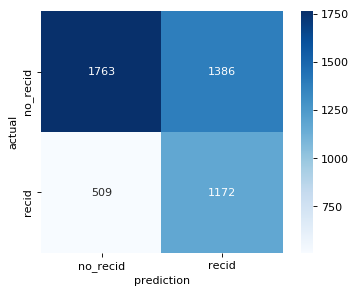

In [444]:

make_confusion_matrix(mod, threshold=.5)

In [283]:
y_pred = mod.predict_proba(X_test)[:,1]
df_pred = pd.DataFrame(y_pred)

In [442]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(mod, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [284]:
fpr, tpr, log_roc = roc_curve(y_test, y_pred)

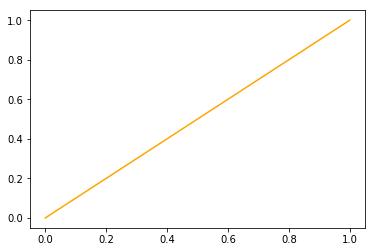

In [285]:

plt.plot([0,1],[0,1],c='orange',ls='-')

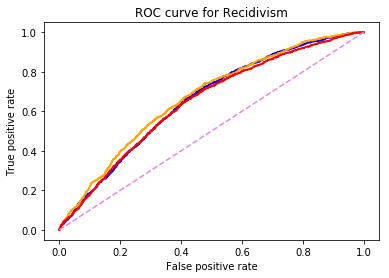

In [445]:
plt.plot(rf_fpr, rf_tpr, lw=2, c='blue')
plt.plot(fpr, tpr, lw=2, c='orange')
plt.plot(nb_fpr, nb_tpr,lw=2, c='red')

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Recidivism')
plt.savefig('Roccurve.svg')



In [287]:
X_test.shape
y_test = pd.DataFrame(y_test)
y_test

,recid_flag
3352,0
14659,1
4670,1
5383,0
8337,0
9875,0
15904,0
16983,1
23526,0
24271,1


In [288]:
index_for_merge = list(X_test.index.values)
print(len(index_for_merge))



4830


In [289]:
# index_formerge = list(X_test.index.values)
X_test['for_merge'] = index_for_merge
print(type(X_test))
y_test = pd.DataFrame(y_test)


<class 'pandas.core.frame.DataFrame'>


In [290]:
df_pred_binary['for_merge'] = index_for_merge
df_pred['for_merge'] = index_for_merge

In [291]:
df = pd.merge(X_test, y_test, left_index=True, right_index=True)
df = pd.merge(df, df_pred, left_on = 'for_merge', right_on = 'for_merge')
df = pd.merge(df, df_pred_binary,left_on = 'for_merge', right_on = 'for_merge')
df.drop(columns = 'for_merge', inplace=True)
df.rename(columns={0:'y_pred'}, inplace = True)
df

,race_American Indian or Alaska Native - Non-Hispanic,race_Asian or Pacific Islander - Non-Hispanic,race_Black - Non-Hispanic,race_White - Hispanic,race_White - Non-Hispanic,age_at_release_25-34,age_at_release_35-44,age_at_release_45-54,age_at_release_55 and Older,age_at_release_Under 25,conviction_class_Aggravated Misdemeanor,conviction_class_B Felony,conviction_class_C Felony,conviction_class_D Felony,conviction_class_Felony - Enhanced,conviction_class_Felony - Enhancement to Original Penalty,conviction_class_Serious Misdemeanor,conviction_class_Special Sentence 2005,convicting_type_Drug,convicting_type_Other,convicting_type_Property,convicting_type_Public Order,convicting_type_Violent,conviction_subtype_Alcohol,conviction_subtype_Arson,conviction_subtype_Assault,conviction_subtype_Burglary,conviction_subtype_Drug Possession,conviction_subtype_Flight/Escape,conviction_subtype_Forgery/Fraud,conviction_subtype_Kidnap,conviction_subtype_Murder/Manslaughter,conviction_subtype_OWI,conviction_subtype_Other Criminal,conviction_subtype_Other Drug,conviction_subtype_Other Public Order,conviction_subtype_Other Violent,conviction_subtype_Robbery,conviction_subtype_Sex,conviction_subtype_Sex Offender Registry/Residency,conviction_subtype_Special Sentence Revocation,conviction_subtype_Theft,conviction_subtype_Traffic,conviction_subtype_Trafficking,conviction_subtype_Vandalism,conviction_subtype_Weapons,release_type_Discharged - Expiration of Sentence,release_type_Discharged – End of Sentence,release_type_Parole,release_type_Parole Granted,release_type_Paroled to Detainer - INS,release_type_Paroled to Detainer - Iowa,release_type_Paroled to Detainer - Out of State,release_type_Paroled to Detainer - U.S. Marshall,release_type_Paroled w/Immediate Discharge,release_type_Released to Special Sentence,release_type_Special Sentence,supervising_district_1JD,supervising_district_2JD,supervising_district_3JD,supervising_district_4JD,supervising_district_5JD,supervising_district_6JD,supervising_district_7JD,supervising_district_8JD,supervising_district_ISC,supervising_district_Interstate Compact,supervising_district_None-Discharged,recid_flag,0_x,0_y
0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.372958,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.596461,1
2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.602792,1
3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.602792,1
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.257380,0
5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.544485,1
6,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.159834,0
7,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.284919,0
8,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.630639,1
9,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.553773,1


## important feature analysis

In [292]:
df_none_dis = df[df['supervising_district_None-Discharged']==1]

### None-Discharged

In [293]:
df_none_dis.sort_values('recid_flag')

,race_American Indian or Alaska Native - Non-Hispanic,race_Asian or Pacific Islander - Non-Hispanic,race_Black - Non-Hispanic,race_White - Hispanic,race_White - Non-Hispanic,age_at_release_25-34,age_at_release_35-44,age_at_release_45-54,age_at_release_55 and Older,age_at_release_Under 25,conviction_class_Aggravated Misdemeanor,conviction_class_B Felony,conviction_class_C Felony,conviction_class_D Felony,conviction_class_Felony - Enhanced,conviction_class_Felony - Enhancement to Original Penalty,conviction_class_Serious Misdemeanor,conviction_class_Special Sentence 2005,convicting_type_Drug,convicting_type_Other,convicting_type_Property,convicting_type_Public Order,convicting_type_Violent,conviction_subtype_Alcohol,conviction_subtype_Arson,conviction_subtype_Assault,conviction_subtype_Burglary,conviction_subtype_Drug Possession,conviction_subtype_Flight/Escape,conviction_subtype_Forgery/Fraud,conviction_subtype_Kidnap,conviction_subtype_Murder/Manslaughter,conviction_subtype_OWI,conviction_subtype_Other Criminal,conviction_subtype_Other Drug,conviction_subtype_Other Public Order,conviction_subtype_Other Violent,conviction_subtype_Robbery,conviction_subtype_Sex,conviction_subtype_Sex Offender Registry/Residency,conviction_subtype_Special Sentence Revocation,conviction_subtype_Theft,conviction_subtype_Traffic,conviction_subtype_Trafficking,conviction_subtype_Vandalism,conviction_subtype_Weapons,release_type_Discharged - Expiration of Sentence,release_type_Discharged – End of Sentence,release_type_Parole,release_type_Parole Granted,release_type_Paroled to Detainer - INS,release_type_Paroled to Detainer - Iowa,release_type_Paroled to Detainer - Out of State,release_type_Paroled to Detainer - U.S. Marshall,release_type_Paroled w/Immediate Discharge,release_type_Released to Special Sentence,release_type_Special Sentence,supervising_district_1JD,supervising_district_2JD,supervising_district_3JD,supervising_district_4JD,supervising_district_5JD,supervising_district_6JD,supervising_district_7JD,supervising_district_8JD,supervising_district_ISC,supervising_district_Interstate Compact,supervising_district_None-Discharged,recid_flag,0_x,0_y
0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.372958,0
3081,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.222206,0
3078,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.402105,0
3074,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.206624,0
3072,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.275777,0
3062,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.473905,0
3059,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.423100,0
3056,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.114576,0
3046,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.510822,1
3082,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.421787,0


 ('release_type_Discharged - Expiration of Sentence', 0.021165863060434977),
 ('age_at_release_25-34', 0.023182474503763227),
 ('age_at_release_55 and Older', 0.024901892726594307),
 ('race_White - Hispanic', 0.02951974794269129),
 ('target_pop_flag', 0.045160978205675294),
 ('supervising_district_ISC', 0.04706316243727532),
 ('convicting_type_Violent', 0.05107895305205886),
 ('supervising_district_5JD', 0.07606929388854781),

### Violent

In [294]:
df_violent = df[df['convicting_type_Violent'] == 1]

In [295]:
df_violent.shape

(1023, 71)

In [297]:
df_errors = df[df['recid_flag'] != df['0_y']]

In [298]:
len(df_errors)

1895

In [299]:
df_sum = pd.DataFrame(df.sum())


In [300]:
df_errors.sum()

race_American Indian or Alaska Native - Non-Hispanic           32.000000
race_Asian or Pacific Islander - Non-Hispanic                   9.000000
race_Black - Non-Hispanic                                     463.000000
race_White - Hispanic                                          55.000000
race_White - Non-Hispanic                                    1336.000000
age_at_release_25-34                                          726.000000
age_at_release_35-44                                          453.000000
age_at_release_45-54                                          300.000000
age_at_release_55 and Older                                    57.000000
age_at_release_Under 25                                       359.000000
conviction_class_Aggravated Misdemeanor                       345.000000
conviction_class_B Felony                                     146.000000
conviction_class_C Felony                                     474.000000
conviction_class_D Felony                          

In [301]:
df_error_perc = df_errors.sum()/df.sum()

In [302]:
df = pd.DataFrame(df_error_perc.sort_values(ascending=True))

In [303]:
df = pd.merge(df, df_sum, left_index=True, right_index=True)

In [53]:
df.rename(columns = {'0_x':"Percent_error", '0_y': 'Total count in X_Test'}, inplace=True)

In [55]:
df.sort_values('Total count in X_Test')

,Percent_error,Total count in X_Test
release_type_Paroled to Detainer - Iowa,0.222222,9
conviction_subtype_Kidnap,0.300000,10
release_type_Paroled to Detainer - U.S. Marshall,0.066667,15
conviction_subtype_Special Sentence Revocation,0.352941,17
conviction_class_Special Sentence 2005,0.470588,17
release_type_Paroled to Detainer - Out of State,0.380952,21
conviction_subtype_Sex Offender Registry/Residency,0.380952,21
conviction_subtype_Flight/Escape,0.409091,22
release_type_Paroled to Detainer - INS,0.000000,26
race_Asian or Pacific Islander - Non-Hispanic,0.290323,31


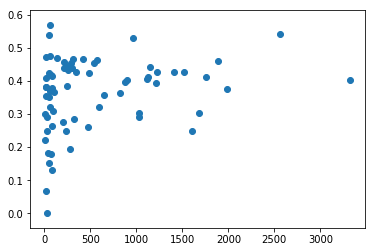

In [65]:
plt.scatter(df['Total count in X_Test'], df['Percent_error'])

### Hispanic

In [304]:
df_hispanic_errors = df_errors[df_errors[ 'race_White - Hispanic']==1]
df_hispanic_errors

,race_American Indian or Alaska Native - Non-Hispanic,race_Asian or Pacific Islander - Non-Hispanic,race_Black - Non-Hispanic,race_White - Hispanic,race_White - Non-Hispanic,age_at_release_25-34,age_at_release_35-44,age_at_release_45-54,age_at_release_55 and Older,age_at_release_Under 25,conviction_class_Aggravated Misdemeanor,conviction_class_B Felony,conviction_class_C Felony,conviction_class_D Felony,conviction_class_Felony - Enhanced,conviction_class_Felony - Enhancement to Original Penalty,conviction_class_Serious Misdemeanor,conviction_class_Special Sentence 2005,convicting_type_Drug,convicting_type_Other,convicting_type_Property,convicting_type_Public Order,convicting_type_Violent,conviction_subtype_Alcohol,conviction_subtype_Arson,conviction_subtype_Assault,conviction_subtype_Burglary,conviction_subtype_Drug Possession,conviction_subtype_Flight/Escape,conviction_subtype_Forgery/Fraud,conviction_subtype_Kidnap,conviction_subtype_Murder/Manslaughter,conviction_subtype_OWI,conviction_subtype_Other Criminal,conviction_subtype_Other Drug,conviction_subtype_Other Public Order,conviction_subtype_Other Violent,conviction_subtype_Robbery,conviction_subtype_Sex,conviction_subtype_Sex Offender Registry/Residency,conviction_subtype_Special Sentence Revocation,conviction_subtype_Theft,conviction_subtype_Traffic,conviction_subtype_Trafficking,conviction_subtype_Vandalism,conviction_subtype_Weapons,release_type_Discharged - Expiration of Sentence,release_type_Discharged – End of Sentence,release_type_Parole,release_type_Parole Granted,release_type_Paroled to Detainer - INS,release_type_Paroled to Detainer - Iowa,release_type_Paroled to Detainer - Out of State,release_type_Paroled to Detainer - U.S. Marshall,release_type_Paroled w/Immediate Discharge,release_type_Released to Special Sentence,release_type_Special Sentence,supervising_district_1JD,supervising_district_2JD,supervising_district_3JD,supervising_district_4JD,supervising_district_5JD,supervising_district_6JD,supervising_district_7JD,supervising_district_8JD,supervising_district_ISC,supervising_district_Interstate Compact,supervising_district_None-Discharged,recid_flag,0_x,0_y
287,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.564022,1
378,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.542097,1
457,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.528405,1
462,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.482182,0
519,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.229067,0
534,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.522552,1
838,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.482926,0
855,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.553357,1
1065,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.485724,0
1348,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.435099,0


In [306]:
df_hispanic_error = df_hispanic[df_hispanic['recid_flag'] != df_hispanic['0_y']]


In [325]:
len(df_hispanic_error)
X_test_hispanic_count = len(X_test[X_test['race_White - Hispanic'] == 1])
X_test_hispanic_count

281

In [327]:
hisp_false_pos = df_hispanic_error['0_y'].sum()
hisp_false_neg = len(df_hispanic_error) - hisp_false_pos
print('Total Hispanic Population Count in Test Set %s' %X_test_hispanic_count)
print('False positives for Hispanic Population %s' %hisp_false_pos)
print('False negatives for Hispanic Population %s' %hisp_false_neg)


Total Hispanic Population Count in Test Set 281
False positives for Hispanic Population 27
False negatives for Hispanic Population 28


### Black

In [429]:
list(df)

['recid_flag',
 'target_pop_flag',
 'year_released_2010',
 'year_released_2011',
 'year_released_2012',
 'year_released_2013',
 'year_released_2014',
 'year_released_2015',
 'reporting_year_2013',
 'reporting_year_2014',
 'reporting_year_2015',
 'reporting_year_2016',
 'reporting_year_2017',
 'reporting_year_2018',
 'race_American Indian or Alaska Native - Non-Hispanic',
 'race_Asian or Pacific Islander - Non-Hispanic',
 'race_Black - Non-Hispanic',
 'race_White - Hispanic',
 'race_White - Non-Hispanic',
 'age_at_release_25-34',
 'age_at_release_35-44',
 'age_at_release_45-54',
 'age_at_release_55 and Older',
 'age_at_release_Under 25',
 'conviction_class_Aggravated Misdemeanor',
 'conviction_class_B Felony',
 'conviction_class_C Felony',
 'conviction_class_D Felony',
 'conviction_class_Felony - Enhanced',
 'conviction_class_Felony - Enhancement to Original Penalty',
 'conviction_class_Serious Misdemeanor',
 'conviction_class_Special Sentence 2005',
 'convicting_type_Drug',
 'convictin

In [431]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
mask_black = df[df['race_Black - Non-Hispanic']==1]
mask_black['recid_flag'].sum()/len(mask_black)

0.34534904167399333

### White

In [432]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
mask_white = df[df['race_White - Non-Hispanic']==1]
mask_white['recid_flag'].sum()/len(mask_white)


0.3531591737545565

### 55 and Older

In [320]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]

df = df_trimmer.no_years_no_target(df)
X = df[0]
older_55_count = len(X_test[X_test['age_at_release_55 and Older']==1])
older_55_count

230

In [321]:

df_55_error = df_errors[df_errors['age_at_release_55 and Older']==1]
false_pos_55 = df_55_error['0_y'].sum()
false_neg_55 = len(df_55_error) - false_pos_55
print('Total 55 and older Population Count in Test Set %s' %older_55_count)
print('False positives for 55 and older population %s' %false_pos_55)
print('False negatives for 55 and older population %s' %false_neg_55)

Total 55 and older Population Count in Test Set 230
False positives for 55 and older population 10
False negatives for 55 and older population 47


In [310]:
df_55_error

,race_American Indian or Alaska Native - Non-Hispanic,race_Asian or Pacific Islander - Non-Hispanic,race_Black - Non-Hispanic,race_White - Hispanic,race_White - Non-Hispanic,age_at_release_25-34,age_at_release_35-44,age_at_release_45-54,age_at_release_55 and Older,age_at_release_Under 25,conviction_class_Aggravated Misdemeanor,conviction_class_B Felony,conviction_class_C Felony,conviction_class_D Felony,conviction_class_Felony - Enhanced,conviction_class_Felony - Enhancement to Original Penalty,conviction_class_Serious Misdemeanor,conviction_class_Special Sentence 2005,convicting_type_Drug,convicting_type_Other,convicting_type_Property,convicting_type_Public Order,convicting_type_Violent,conviction_subtype_Alcohol,conviction_subtype_Arson,conviction_subtype_Assault,conviction_subtype_Burglary,conviction_subtype_Drug Possession,conviction_subtype_Flight/Escape,conviction_subtype_Forgery/Fraud,conviction_subtype_Kidnap,conviction_subtype_Murder/Manslaughter,conviction_subtype_OWI,conviction_subtype_Other Criminal,conviction_subtype_Other Drug,conviction_subtype_Other Public Order,conviction_subtype_Other Violent,conviction_subtype_Robbery,conviction_subtype_Sex,conviction_subtype_Sex Offender Registry/Residency,conviction_subtype_Special Sentence Revocation,conviction_subtype_Theft,conviction_subtype_Traffic,conviction_subtype_Trafficking,conviction_subtype_Vandalism,conviction_subtype_Weapons,release_type_Discharged - Expiration of Sentence,release_type_Discharged – End of Sentence,release_type_Parole,release_type_Parole Granted,release_type_Paroled to Detainer - INS,release_type_Paroled to Detainer - Iowa,release_type_Paroled to Detainer - Out of State,release_type_Paroled to Detainer - U.S. Marshall,release_type_Paroled w/Immediate Discharge,release_type_Released to Special Sentence,release_type_Special Sentence,supervising_district_1JD,supervising_district_2JD,supervising_district_3JD,supervising_district_4JD,supervising_district_5JD,supervising_district_6JD,supervising_district_7JD,supervising_district_8JD,supervising_district_ISC,supervising_district_Interstate Compact,supervising_district_None-Discharged,recid_flag,0_x,0_y
203,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.301382,0
341,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.506259,1
348,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.623363,1
519,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.229067,0
564,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.429483,0
919,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.542775,1
921,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.268781,0
958,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.301382,0
1085,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.071375,0
1198,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.372260,0


### Murder

In [322]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]

df = df_trimmer.no_years_no_target(df)
X = df[0]
df_murder_count = len(X_test[X_test['conviction_subtype_Murder/Manslaughter']==1])
df_murder_count

67

In [323]:
df_murder_error = df_errors[df_errors['conviction_subtype_Murder/Manslaughter']==1]
false_pos_murder = df_murder_error['0_y'].sum()
false_neg_murder = len(df_murder_error) - false_pos_murder
print('Total Convicted Murderer Population Count in Test Set %s' %df_murder_count)
print('False positive Convicted Murderer and older population %s' %false_pos_murder)
print('False negative Convicted Murderer and older population %s' %false_neg_murder)

Total Convicted Murderer Population Count in Test Set 67
False positive Convicted Murderer and older population 0
False negative Convicted Murderer and older population 12


### Assault

In [433]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
mask_assault = df[df['conviction_subtype_Assault']==1]
mask_assault['recid_flag'].sum()/len(mask_assault)



0.28096885813148786

### Sex

In [434]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
mask_sex = df[df['conviction_subtype_Sex']==1]
mask_sex['recid_flag'].sum()/len(mask_sex)


0.28780934922089824

### Explore Hispanic, over 55, murder

In [389]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
# at_risk_mask = at_risk_mask[at_risk_mask['conviction_subtype_Murder/Manslaughter']==1] 

In [391]:
murder_mask = df[df['conviction_subtype_Murder/Manslaughter']==1]

len(murder_mask)

377

In [392]:
murder_mask['recid_flag'].sum()/len(murder_mask)


0.16180371352785147

In [393]:
murder_mask['recid_flag'].sum()


61

In [394]:
hispanic_at_risk = df[df['race_White - Hispanic']==1]


In [395]:
hispanic_at_risk['recid_flag'].sum()

303

In [396]:
len(hispanic_at_risk)

1365

In [397]:
at_risk_mask_55 = df[df['age_at_release_55 and Older']==1]


In [398]:
len(at_risk_mask_55)

1188

In [399]:
at_risk_mask_55['recid_flag'].sum()

242

In [400]:
at_risk_mask_55['recid_flag'].sum()/len(at_risk_mask_55)

0.2037037037037037

In [401]:
list(df)

['recid_flag',
 'target_pop_flag',
 'year_released_2010',
 'year_released_2011',
 'year_released_2012',
 'year_released_2013',
 'year_released_2014',
 'year_released_2015',
 'reporting_year_2013',
 'reporting_year_2014',
 'reporting_year_2015',
 'reporting_year_2016',
 'reporting_year_2017',
 'reporting_year_2018',
 'race_American Indian or Alaska Native - Non-Hispanic',
 'race_Asian or Pacific Islander - Non-Hispanic',
 'race_Black - Non-Hispanic',
 'race_White - Hispanic',
 'race_White - Non-Hispanic',
 'age_at_release_25-34',
 'age_at_release_35-44',
 'age_at_release_45-54',
 'age_at_release_55 and Older',
 'age_at_release_Under 25',
 'conviction_class_Aggravated Misdemeanor',
 'conviction_class_B Felony',
 'conviction_class_C Felony',
 'conviction_class_D Felony',
 'conviction_class_Felony - Enhanced',
 'conviction_class_Felony - Enhancement to Original Penalty',
 'conviction_class_Serious Misdemeanor',
 'conviction_class_Special Sentence 2005',
 'convicting_type_Drug',
 'convictin

### 25-34

In [404]:
at_risk_mask_25to34 = df[df['age_at_release_25-34']==1]


In [405]:
at_risk_mask_25to34['recid_flag'].sum()

3296

In [406]:
at_risk_mask_25to34['recid_flag'].sum()/len(at_risk_mask_25to34)

0.37247146570233924

### 45-54

In [428]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
mask_45to54 = df[df['age_at_release_45-54']==1]
mask_45to54['recid_flag'].sum()/len(mask_45to54)

0.2932940309506264

### Supervising District None-Discharged

In [446]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
none_dis = df[df['supervising_district_None-Discharged']==1]
none_dis['recid_flag'].sum()/len(none_dis)

0.21849606603895266

### Target Population

In [448]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
target_pop = df[df['target_pop_flag']==1]
target_pop['recid_flag'].sum()/len(target_pop)

0.39154438471596686

### Supervising District

In [449]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
fivejd = df[df['supervising_district_5JD']==1]
fivejd['recid_flag'].sum()/len(fivejd)


0.44969818913480886

In [450]:
len(fivejd)

4970

2235

In [452]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
eos = df[df['release_type_Discharged – End of Sentence']==1]
eos['recid_flag'].sum()/len(eos)


0.24643788882199477

In [453]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
mask =[feature  for feature in list(df) if df[feature].sum() > 50]
df = df[mask]
violent = df[df['convicting_type_Violent']==1]
violent['recid_flag'].sum()/len(violent)


0.2708966565349544